<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


2.0


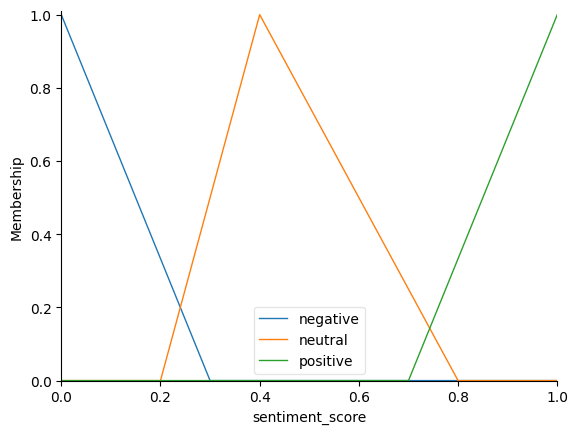

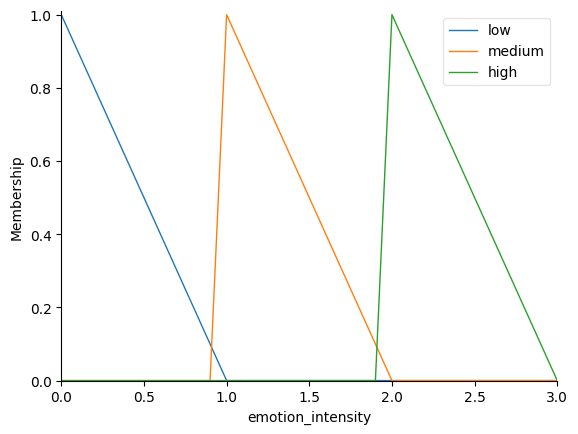

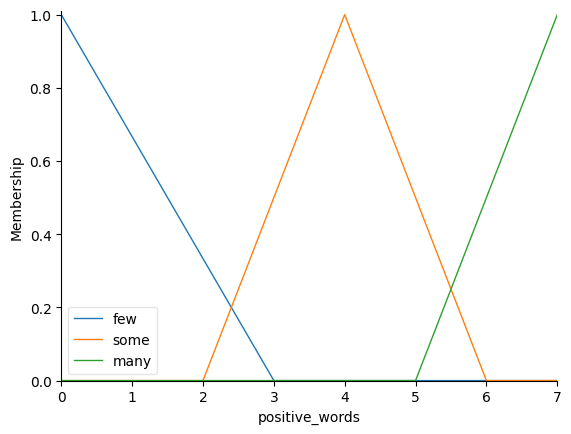

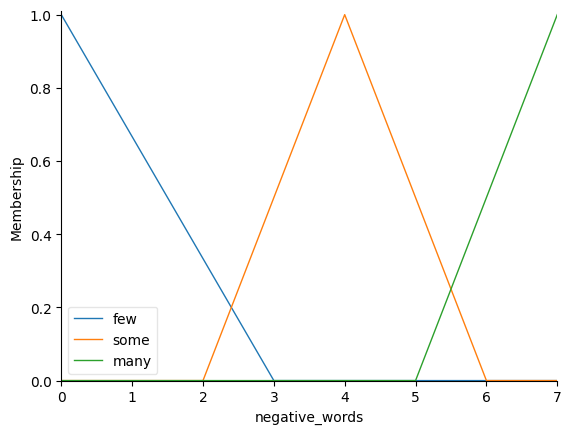

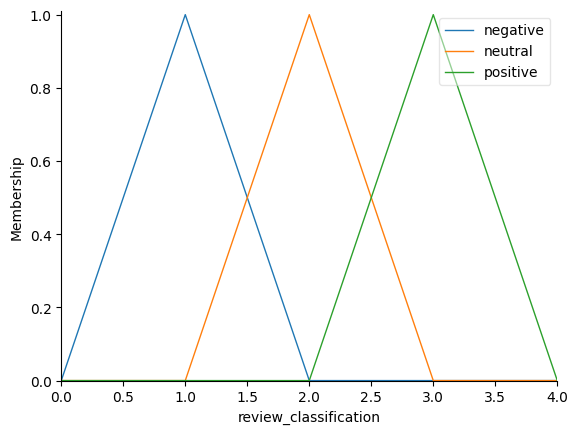

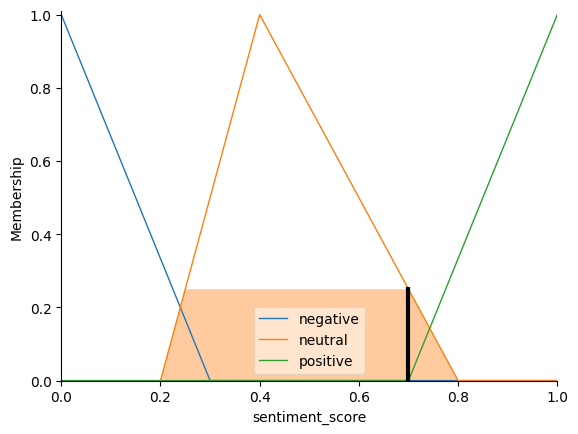

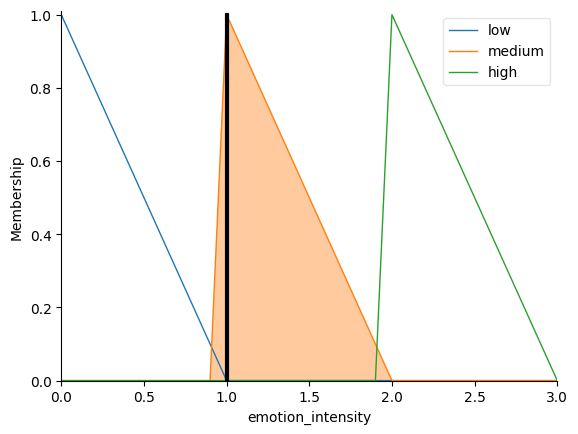

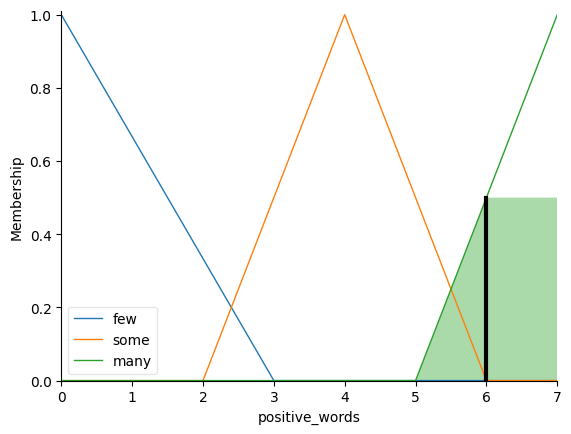

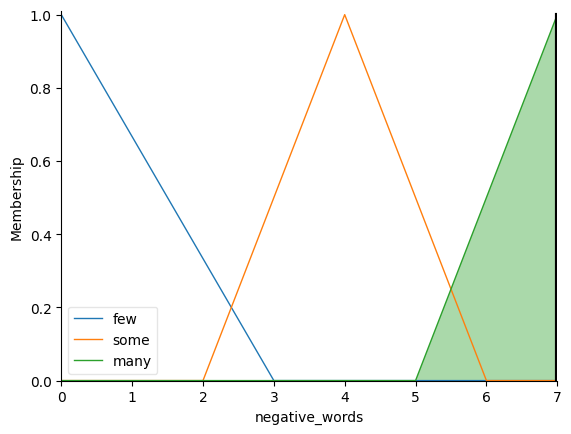

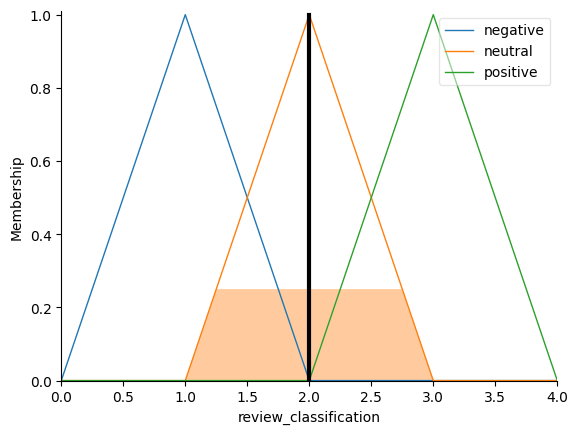

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 7.1, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 7.1, 1), 'negative_words')
review_classification = ctrl.Consequent(np.arange(0, 4.1, 1), 'review_classification')

sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.2, 0.4, 0.8])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 1])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.9, 1, 2])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [1.9, 2, 3])

positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 3])
positive_words['some'] = fuzz.trimf(positive_words.universe, [2, 4, 6])
positive_words['many'] = fuzz.trimf(positive_words.universe, [5, 7, 7])

negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 3])
negative_words['some'] = fuzz.trimf(negative_words.universe, [2, 4, 6])
negative_words['many'] = fuzz.trimf(negative_words.universe, [5, 7, 7])

review_classification['negative'] = fuzz.trimf(review_classification.universe, [0, 1, 2])
review_classification['neutral'] = fuzz.trimf(review_classification.universe, [1, 2, 3])
review_classification['positive'] = fuzz.trimf(review_classification.universe, [2, 3, 4])

sentiment_score.view()
emotion_intensity.view()
positive_words.view()
negative_words.view()
review_classification.view()

rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_classification['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_classification['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_classification['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_classification['positive'])

rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], review_classification['positive'])
rule6 = ctrl.Rule(positive_words['some'] & negative_words['some'], review_classification['neutral'])
rule7 = ctrl.Rule(positive_words['few'] & negative_words['many'], review_classification['negative'])

rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_classification['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & positive_words['some'] & emotion_intensity['medium'], review_classification['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_classification['positive'])
fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
feedback_system = ctrl.ControlSystemSimulation(fuzzy_system)
feedback_system.input['sentiment_score'] = 0.7
feedback_system.input['emotion_intensity'] = 1
feedback_system.input['positive_words'] = 6
feedback_system.input['negative_words'] = 8
feedback_system.compute()
print(feedback_system.output['review_classification'])
sentiment_score.view(sim=feedback_system)
emotion_intensity.view(sim=feedback_system)
positive_words.view(sim=feedback_system)
negative_words.view(sim=feedback_system)
review_classification.view(sim=feedback_system)